In [ ]:
using Pkg
Pkg.add("ProgressBars")
Pkg.add("QuantEcon")
Pkg.add("SymPy")

In [1]:
using QuantEcon, SymPy, ProgressBars
using LinearAlgebra, PyPlot

In [30]:
import Base.iterate,Base.length
struct Combinations{T}
    itr::Vector{T}
    count::Int64
    itrsize::Int64
    function Combinations(itr::Vector{T},count::Int) where T
        new{T}(itr,Int64(count),length(itr))
    end
end

function iterate(c::Combinations,state::Int64=0)
    if state>=length(c)
        return nothing
    end
    indices=digits(state,base=c.itrsize,pad=c.count)
    [c.itr[i] for i in (indices .+1)],state+1
end

function length(c::Combinations)
    length(c.itr) ^ c.count
end

# states = collect(Combinations([0,1],10))
# dict = Dict(string(i) => 0 for i in states)

length (generic function with 184 methods)

In [31]:
function openMarkov(N, q, α, β, iterations, line=Int.(zeros(N)))
    entry = N+1
    exit = N+2
    states = collect(Combinations([0,1],N))
    dict = Dict(string(i) => 0 for i in states)
    for i in ProgressBar(1:iterations)
        
        dict[string(line)] += 1
        index = rand(1:N+2)
        
        if index==entry || index==exit #boundaries
            if index==entry && line[1]==0 && rand() <= α #entry condition
                line[1] = 1
            elseif index==exit && line[N]==1 && rand() <= β #exit condition 
                line[N] = 0
            end
            
        elseif line[index]==1 #point on the line 
            prospective_index = if (rand() <= q) index-1 else index+1 end
            if (prospective_index>=1 && prospective_index<=N && line[prospective_index]==0)
                line[index] = 0
                line[prospective_index] = 1
            end
        end
        
    end
    dict = Dict(key => dict[key]/iterations for key in collect(keys(dict)))
    return line, dict
end

openMarkov (generic function with 2 methods)

In [39]:
N = 2
q = 0
α = 1
β = 1
iterations = 1e5

line, dist = openMarkov(N, q, α, β, iterations)
dist

100.0%┣█████████████████████████████┫ 100000/100000 [00:00<00:00, 270723.1 it/s]


Dict{String,Float64} with 4 entries:
  "[1, 0]" => 0.405
  "[0, 1]" => 0.1954
  "[1, 1]" => 0.20021
  "[0, 0]" => 0.19939

In [40]:
N = 1
d = N+2
q = 0
α = 1
β = 1

P = [1-α/d α/d
     β/d 1-β/d]
mc = MarkovChain(P)
stationary_distributions(mc)

1-element Array{Array{Float64,1},1}:
 [0.5, 0.5]

In [34]:
N = 3
q = 0
α = 1
β = 1
iterations = 1e6

_, dist = openMarkov(N, q, α, β, iterations)
dist

100.0%┣███████████████████████████┫ 1000000/1000000 [00:02<00:00, 539246.5 it/s]46254/1000000 [00:00<00:07, 138167.4 it/s]398309/1000000 [00:01<00:01, 442807.7 it/s]480597/1000000 [00:01<00:01, 474784.0 it/s]766722/1000000 [00:02<00:00, 510952.0 it/s]906814/1000000 [00:02<00:00, 525165.4 it/s]


Dict{String,Float64} with 8 entries:
  "[1, 0, 1]" => 0.142195
  "[1, 1, 0]" => 0.214424
  "[0, 0, 1]" => 0.071463
  "[0, 0, 0]" => 0.072283
  "[1, 1, 1]" => 0.070816
  "[0, 1, 1]" => 0.070472
  "[1, 0, 0]" => 0.215298
  "[0, 1, 0]" => 0.143049

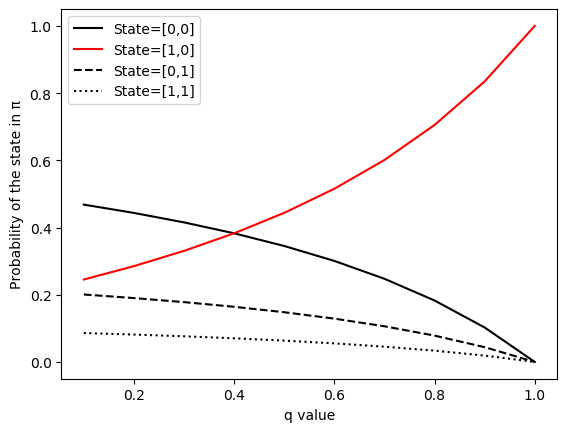

PyObject <matplotlib.legend.Legend object at 0x000000005B7045F8>

In [170]:
function sd2(q, α, β)
    N = 2
    d = N+2
    P = [1-α/d α/d 0 0
         0 1-(1-q)/d (1-q)/d 0
         β/d q/d 1-(q+α+β)/d α/d
         0 β/d 0 1-β/d]
    mc = MarkovChain(P)
    return stationary_distributions(mc)
end

# N = 2
# d = N+2
q = 0
α = 1
β = 1



# x_vals = [i/10 for i=1:10]
# state_1 = []
# state_2 = []
# state_3 = []
# state_4 = []
# for x in x_vals
#     dist = sd2(x, α, β)[1]
#     push!(state_1, dist[1])
#     push!(state_2, dist[2])
#     push!(state_3, dist[3])
#     push!(state_4, dist[4])    
# end
# plot(x_vals, state_1, label="State=[0,0]", color="black")
# plot(x_vals, state_2, label="State=[1,0]", color="red")
# plot(x_vals, state_3, label="State=[0,1]", color="black", linestyle="dashed")
# plot(x_vals, state_4, label="State=[1,1]", color="black", linestyle="dotted")
# xlabel("q value")
# ylabel("Probability of the state in π")
# legend()

# state_3, state_1, state_4

In [3]:
function sd3(q, α, β)
    N = 3
    d = N+2
    P = [1-α/d α/d 0 0 0 0 0 0
         0 1-(1-q)/d (1-q)/d 0 0 0 0 0
         0 q/d 1-(1+α)/d (1-q)/d α/d 0 0 0
         β/d 0 q/d 1-(q+α+β)/d 0 α/d 0 0
         0 0 0 0 1-(1-q)/d (1-q)/d 0 0
         0 β/d 0 0 q/d 1-(1+β)/d (1-q)/d 0
         0 0 β/d 0 0 q/d 1-(q+α+β)/d α/d
         0 0 0 0 β/d 0 0 1-β/d]
    mc = MarkovChain(P)
    return stationary_distributions(mc)
end

# N=3
# d=N+2
q = 0
α = 1
β = 1

sd3(q, α, β)

# x_vals = [i/10 for i=1:10]
# state_1 = []
# state_2 = []
# state_3 = []
# state_4 = []
# state_5 = []
# state_6 = []
# state_7 = []
# state_8 = []
# for x in x_vals
#     if x == 1
#         inp = .99
#     else
#         inp = x
#     end
#     dist = sd3(inp, α, β)[1]
#     push!(state_1, dist[1])
#     push!(state_2, dist[2])
#     push!(state_3, dist[3])
#     push!(state_4, dist[4])  
#     push!(state_5, dist[5])
#     push!(state_6, dist[6])
#     push!(state_7, dist[7])
#     push!(state_8, dist[8]) 
# end

# plot(x_vals, state_1, color="black", label="States 1,4,7,8") #label="State 1")
# plot(x_vals, state_2, color="red", label="States 2,5") #label="State 2") 
# plot(x_vals, state_3, color="turquoise", label="States 3,6") #label = "State 3") 
# plot(x_vals, state_4, color="black", linestyle="dashed", label="State 4")
# plot(x_vals, state_5, color="red", linestyle="dashed", label="State 5")
# plot(x_vals, state_6, color="turquoise", linestyle="dashed", label="State 6")
# plot(x_vals, state_7, color="black", linestyle="dotted", label="State 7")
# plot(x_vals, state_8, color="black", linestyle="dashdot", label="State 8")
# xlabel("q value")
# ylabel("Probability of the state in π")
# legend()

# A = P'-I
# x = [1 for i=1:8]'
# A = vcat(A,x)
# b = push!([0 for i=1:8], 1)

# # Aπ = b
# pi = A \ b

# "[0, 0, 0]" => 0.0613
# "[1, 0, 0]" => 0.2049
# "[0, 1, 0]" => 0.1478
# "[0, 0, 1]" => 0.0707
# "[1, 1, 0]" => 0.2103
# "[1, 0, 1]" => 0.15
# "[0, 1, 1]" => 0.0787
# "[1, 1, 1]" => 0.0763

# [0.07142857142857142,
# 0.21428571428571427, 
# 0.14285714285714285, 
# 0.07142857142857142, 
# 0.21428571428571427, 
# 0.14285714285714285, 
# 0.07142857142857142, 
# 0.07142857142857142]

1-element Array{Array{Float64,1},1}:
 [0.07142857142857142, 0.21428571428571427, 0.14285714285714285, 0.07142857142857142, 0.21428571428571427, 0.14285714285714285, 0.07142857142857142, 0.07142857142857142]

In [2]:
q = Sym("q")
α = Sym("α")
β = Sym("β")
d = Sym("d")

P = [1-α/d α/d 0 0 0 0 0 0
     0 1-(1-q)/d (1-q)/d 0 0 0 0 0
     0 q/d 1-(1+α)/d (1-q)/d α/d 0 0 0
     β/d 0 q/d 1-(q+α+β)/d 0 α/d 0 0
     0 0 0 0 1-(1-q)/d (1-q)/d 0 0
     0 β/d 0 0 q/d 1-(1+β)/d (1-q)/d 0
     0 0 β/d 0 0 q/d 1-(q+α+β)/d α/d
     0 0 0 0 β/d 0 0 1-β/d]

A = P'-I 
A = vcat(A,[1 for i=1:8]')

# mc = MarkovChain(P)
# stationary_distributions(mc)

9×8 Array{Sym,2}:
 -adjoint(α)/adjoint(d)  …                       0
  adjoint(α)/adjoint(d)                          0
                      0                          0
                      0                          0
                      0      adjoint(β)/adjoint(d)
                      0  …                       0
                      0                          0
                      0     -adjoint(β)/adjoint(d)
                      1                          1

In [5]:
π_1 = Sym("π_1")
π_2 = Sym("π_2")
π_3 = Sym("π_3")
π_4 = Sym("π_4")
π_5 = Sym("π_5")
π_6 = Sym("π_6")
π_7 = Sym("π_7")
π_8 = Sym("π_8")

p = [π_1, π_2, π_3, π_4, π_5, π_6, π_7, π_8]
b = push!([0 for i=1:8], 1)

# pi = A\b
# ProgressBar(A\b)

to_solve = A*p#-push!(p, 1)
# @show to_solve
# SymPy.solve(to_solve)

# @show SymPy.solve(to_solve[3,:], π_3)

eq_1 = π_4*(β/α)-π_1
eq_2 = -(π_1*α + π_3*q)/(q-1) - π_2
eq_3 = (-π_2*q + π_2 + π_4*q + π_6*β + π_7*β)/(α+1) - π_3
eq_4 = π_3*(1-q)/(q+α+β) - π_4
eq_5 = -(π_3*α + π_6*q + π_8*β)/(q-1) - π_5
eq_6 = (π_4*α - π_5*q + π_5 + π_7*q)/(β+1) - π_6
eq_7 = π_6 * (1-q)/(q+α+β) - π_7
eq_8 = π_7*(α/β) - π_8
eq_9 = π_1 + π_2 + π_3 + π_4 + π_5 + π_6 + π_7 + π_8 - 1

pi = SymPy.solve([eq_1, eq_2, eq_3, eq_4, eq_5, eq_6, eq_7, eq_8, eq_9], [π_1, π_2, π_3, π_4, π_5, π_6, π_7, π_8])
@show pi

pi = Dict{Any,Any}(π_6 => -α^2*β*(q^2 + q*α + q*β - q - α - β)/(q^2*α^3 + q^2*α^2*β + q^2*α*β^2 + q^2*β^3 - q*α^3*β - 2*q*α^3 + q*α^2*β^2 - q*α^2*β - q*α*β^3 - q*α*β^2 - 2*q*β^3 + α^3*β^2 + 2*α^3*β + α^3 + α^2*β^3 + 2*α^2*β^2 + α^2*β + 2*α*β^3 + α*β^2 + β^3),π_8 => α^3*(q^2 - 2*q + 1)/(q^2*α^3 + q^2*α^2*β + q^2*α*β^2 + q^2*β^3 - q*α^3*β - 2*q*α^3 + q*α^2*β^2 - q*α^2*β - q*α*β^3 - q*α*β^2 - 2*q*β^3 + α^3*β^2 + 2*α^3*β + α^3 + α^2*β^3 + 2*α^2*β^2 + α^2*β + 2*α*β^3 + α*β^2 + β^3),π_7 => α^2*β*(q^2 - 2*q + 1)/(q^2*α^3 + q^2*α^2*β + q^2*α*β^2 + q^2*β^3 - q*α^3*β - 2*q*α^3 + q*α^2*β^2 - q*α^2*β - q*α*β^3 - q*α*β^2 - 2*q*β^3 + α^3*β^2 + 2*α^3*β + α^3 + α^2*β^3 + 2*α^2*β^2 + α^2*β + 2*α*β^3 + α*β^2 + β^3),π_4 => α*β^2*(q^2 - 2*q + 1)/(q^2*α^3 + q^2*α^2*β + q^2*α*β^2 + q^2*β^3 - q*α^3*β - 2*q*α^3 + q*α^2*β^2 - q*α^2*β - q*α*β^3 - q*α*β^2 - 2*q*β^3 + α^3*β^2 + 2*α^3*β + α^3 + α^2*β^3 + 2*α^2*β^2 + α^2*β + 2*α*β^3 + α*β^2 + β^3),π_2 => α*β^2*(q^2 + q*α + β)/(q^2*α^3 + q^2*α^2*β + q^2*α*β^2 + q^2*

Dict{Any,Any} with 8 entries:
  π_6 => -α^2*β*(q^2 + q*α + q*β - q - α - β)/(q^2*α^3 + q^2*α^2*β + q^2*α*β^2 …
  π_8 => α^3*(q^2 - 2*q + 1)/(q^2*α^3 + q^2*α^2*β + q^2*α*β^2 + q^2*β^3 - q*α^3…
  π_7 => α^2*β*(q^2 - 2*q + 1)/(q^2*α^3 + q^2*α^2*β + q^2*α*β^2 + q^2*β^3 - q*α…
  π_4 => α*β^2*(q^2 - 2*q + 1)/(q^2*α^3 + q^2*α^2*β + q^2*α*β^2 + q^2*β^3 - q*α…
  π_2 => α*β^2*(q^2 + q*α + β)/(q^2*α^3 + q^2*α^2*β + q^2*α*β^2 + q^2*β^3 - q*α…
  π_1 => β^3*(q^2 - 2*q + 1)/(q^2*α^3 + q^2*α^2*β + q^2*α*β^2 + q^2*β^3 - q*α^3…
  π_5 => α^2*β*(q^2 + 2*q*β + α*β + α + β^2)/(q^2*α^3 + q^2*α^2*β + q^2*α*β^2 +…
  π_3 => -α*β^2*(q^2 + q*α + q*β - q - α - β)/(q^2*α^3 + q^2*α^2*β + q^2*α*β^2 …

In [6]:
[
    pi[π_1],
    pi[π_2],
    pi[π_3],
    pi[π_4],
    pi[π_5],
    pi[π_6],
    pi[π_7],
    pi[π_8]
]

8-element Array{Sym,1}:
                  β^3*(q^2 - 2*q + 1)/(q^2*α^3 + q^2*α^2*β + q^2*α*β^2 + q^2*β^3 - q*α^3*β - 2*q*α^3 + q*α^2*β^2 - q*α^2*β - q*α*β^3 - q*α*β^2 - 2*q*β^3 + α^3*β^2 + 2*α^3*β + α^3 + α^2*β^3 + 2*α^2*β^2 + α^2*β + 2*α*β^3 + α*β^2 + β^3)
                α*β^2*(q^2 + q*α + β)/(q^2*α^3 + q^2*α^2*β + q^2*α*β^2 + q^2*β^3 - q*α^3*β - 2*q*α^3 + q*α^2*β^2 - q*α^2*β - q*α*β^3 - q*α*β^2 - 2*q*β^3 + α^3*β^2 + 2*α^3*β + α^3 + α^2*β^3 + 2*α^2*β^2 + α^2*β + 2*α*β^3 + α*β^2 + β^3)
 -α*β^2*(q^2 + q*α + q*β - q - α - β)/(q^2*α^3 + q^2*α^2*β + q^2*α*β^2 + q^2*β^3 - q*α^3*β - 2*q*α^3 + q*α^2*β^2 - q*α^2*β - q*α*β^3 - q*α*β^2 - 2*q*β^3 + α^3*β^2 + 2*α^3*β + α^3 + α^2*β^3 + 2*α^2*β^2 + α^2*β + 2*α*β^3 + α*β^2 + β^3)
                α*β^2*(q^2 - 2*q + 1)/(q^2*α^3 + q^2*α^2*β + q^2*α*β^2 + q^2*β^3 - q*α^3*β - 2*q*α^3 + q*α^2*β^2 - q*α^2*β - q*α*β^3 - q*α*β^2 - 2*q*β^3 + α^3*β^2 + 2*α^3*β + α^3 + α^2*β^3 + 2*α^2*β^2 + α^2*β + 2*α*β^3 + α*β^2 + β^3)
  α^2*β*(q^2 + 2*q*β + α*β + α + β^2)/(q